In [5]:
# Data annotations described here:
# https://www.mpi-inf.mpg.de/departments/computer-vision-and-machine-learning/software-and-datasets/mpii-human-pose-dataset/download
import scipy.io

mat_file_path = 'content/mpii/mpii_human_pose_v1_u12_2/mpii_human_pose_v1_u12_1.mat'
release_data = scipy.io.loadmat(mat_file_path)['RELEASE']
print(f"Fields inside 'RELEASE' structured array: {release_data.dtype.names}")
annolist = release_data['annolist'][0, 0]
print(f"Shape of 'annolist': {annolist.shape}")

first_image_annots = annolist[0, 0]  # Or maybe annolist[0] depending on shape
print("\nInspecti----", first_image_annots.dtype.names)
print(first_image_annots['image'][0][0][0][0])

act = release_data['act'][0, 0]
print(f"act ::: {act}")
filenames_map = {}

for datum in range(annolist.shape[1]):  # Iterate through the second dimension of annolist
    image_annot = annolist[0, datum]  # Access the element using index i in the second dimension
    filename = image_annot['image'][0][0][0][0]  # Extract the filename

    filenames_map[datum] = filename

    if datum < 5:
        print(f"Filename for index {datum}: {filename}")

Fields inside 'RELEASE' structured array: ('annolist', 'img_train', 'version', 'single_person', 'act', 'video_list')
Shape of 'annolist': (1, 24987)

Inspecti---- ('image', 'annorect', 'frame_sec', 'vididx')
037454012.jpg
act ::: [[(array([], dtype='<U1'), array([], dtype='<U1'), array([[-1]], dtype=int16))]
 [(array([], dtype='<U1'), array([], dtype='<U1'), array([[-1]], dtype=int16))]
 [(array([], dtype='<U1'), array([], dtype='<U1'), array([[-1]], dtype=int16))]
 ...
 [(array(['transportation'], dtype='<U14'), array(['pushing car'], dtype='<U11'), array([[972]], dtype=uint16))]
 [(array([], dtype='<U1'), array([], dtype='<U1'), array([[-1]], dtype=int16))]
 [(array([], dtype='<U1'), array([], dtype='<U1'), array([[-1]], dtype=int16))]]
Filename for index 0: 037454012.jpg
Filename for index 1: 095071431.jpg
Filename for index 2: 073199394.jpg
Filename for index 3: 059865848.jpg
Filename for index 4: 015601864.jpg


In [8]:
import os

act = release_data['act'][0, 0]
dataset = []
number_skipped = 0
activities_set = set()

for datum, item in enumerate(act):
    try:
        cat_name = item[0][0][0] if len(item[0]) > 0 and len(item[0][0]) > 0 else None
        act_name = item[0][1][0] if len(item[0]) > 1 and len(item[0][1]) > 0 else None
        activities = str(act_name).split(", ")
        #act_id = item[0][2][0][0] if len(item[0]) > 2 and len(item[0][2]) > 0 else None
        if not act_name:
            number_skipped += 1
            continue
    except IndexError:
        print("IndexError encountered. Skipping this item.")
        continue

    filename = "content/mpii/images/" + str(filenames_map[datum])
    if os.path.exists(filename):
        dataset.append((filename, activities))
        activities_set.update(activities)
    else:
        print(f"File {filename} does not exist. Skipping this item.")
        number_skipped += 1

print(f"number skipped: {number_skipped}")

# Žiūrim ką turim. 🥸
for i, datum in enumerate(dataset):
    filename, act_name = datum
    if i > 100:
        break
    print(f"I: {i}. Filename {filename} act Name: {act_name}")

File content/mpii/images/040348287.jpg does not exist. Skipping this item.
File content/mpii/images/013401523.jpg does not exist. Skipping this item.
File content/mpii/images/002878268.jpg does not exist. Skipping this item.
number skipped: 6957
I: 0. Filename content/mpii/images/015601864.jpg act Name: ['curling']
I: 1. Filename content/mpii/images/015599452.jpg act Name: ['curling']
I: 2. Filename content/mpii/images/005808361.jpg act Name: ['curling']
I: 3. Filename content/mpii/images/086617615.jpg act Name: ['curling']
I: 4. Filename content/mpii/images/060111501.jpg act Name: ['curling']
I: 5. Filename content/mpii/images/070807258.jpg act Name: ['curling']
I: 6. Filename content/mpii/images/002058449.jpg act Name: ['curling']
I: 7. Filename content/mpii/images/021233911.jpg act Name: ['sitting quietly']
I: 8. Filename content/mpii/images/018182497.jpg act Name: ['sitting quietly']
I: 9. Filename content/mpii/images/018340451.jpg act Name: ['sitting', 'talking in person', 'on the

In [9]:
activities_set

{' carving wood',
 '(e.g.',
 '2.5 to 3.1 mph',
 '295)',
 '4-square',
 '75 lbs or more',
 'Alaska Native Games',
 'Anishinaabe Jingle Dancing',
 'BMX',
 'Beguine',
 'Bellair',
 'Bongo',
 "Brukin's",
 'Caribbean Quadrills',
 'Caribbean dance (Abakua',
 'Dinki Mini',
 'Elliptical trainer',
 'Eskimo Olympics',
 'Fitball exercise',
 'G',
 'Gere',
 'Greek',
 'Irish step dancing',
 'Middle Eastern',
 'Nadisodhana',
 'Navy Seal',
 'Power',
 'TV conditioning programs',
 'accordion',
 'active workstation',
 'adults playing (e.g.',
 'aerobic',
 'airline flight attendant',
 'all-terrain vehicle',
 'andor with talking involved (e.g.',
 'applying fertilizer or seeding a lawn',
 'archery',
 'arts and crafts',
 'assisting with birthing,',
 'automobile repair',
 'backpacking',
 'backstage employee',
 'backstroke',
 'badminton',
 'bakery',
 'ballet',
 'ballroom',
 'bamba y plena',
 'base jumping',
 'basketball',
 'batting',
 'beach',
 'benbe)',
 'biathlon',
 'bicycling',
 'billiards',
 'bird watching',


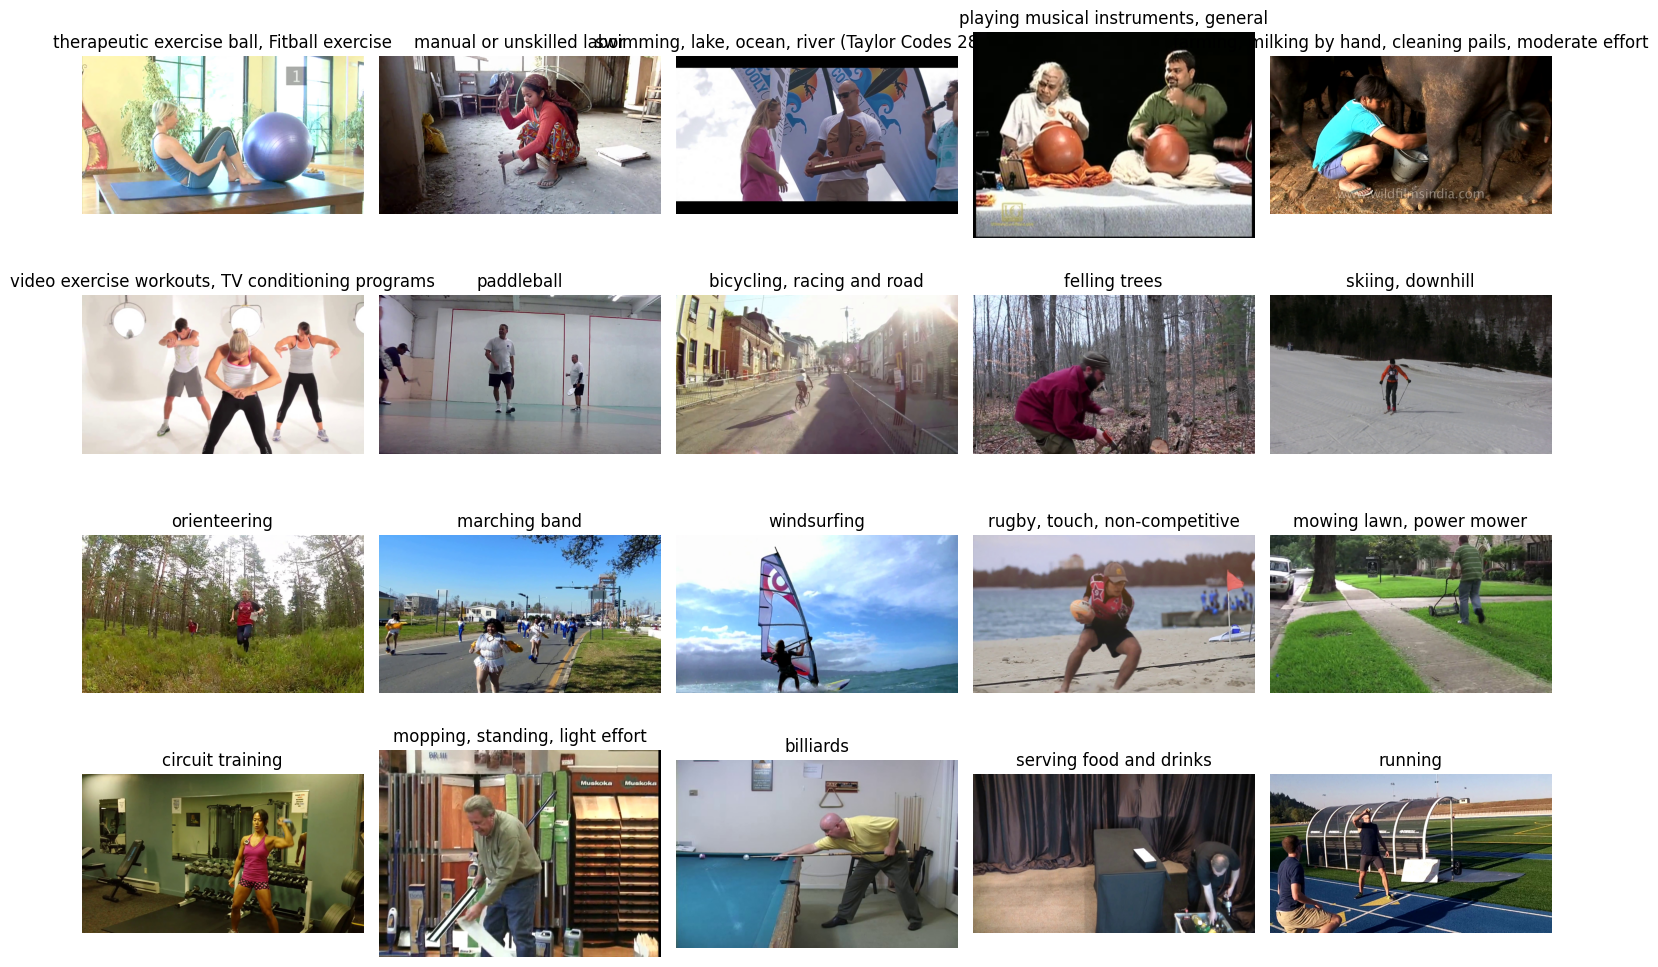

In [11]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_random_images(dataset, num_images=20):
    random_indices = random.sample(range(len(dataset)), num_images)
    plt.figure(figsize=(15, 10))
    for i, idx in enumerate(random_indices):
        filename, act_name = dataset[idx]
        img = mpimg.imread(filename)
        plt.subplot(4, 5, i + 1)
        plt.imshow(img)
        plt.title(", ".join(act_name))
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_random_images(dataset, num_images=20)